In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Exploratory Data Analysis

In [3]:

# as there are many unrealistic values
df = df[(df['temperature'] > -50) & (df['temperature'] < 60)]
df = df[df['humidity'] > 0]
df = df[(df['pressure'] > 90000) & (df['pressure'] < 110000)]

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 667783 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    667783 non-null  int64  
 1   lat          667783 non-null  float64
 2   lon          667783 non-null  float64
 3   pressure     667783 non-null  float64
 4   temperature  667783 non-null  float64
 5   humidity     667783 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 35.7 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [12]:
print(df.isnull().values.any())
print()
# Display summary statistics
print(df.describe(include = "all"))
## Shape of the data
df.shape

False

           sensor_id            lat            lon       pressure  \
count  667783.000000  667783.000000  667783.000000  667783.000000   
mean     2808.264980      42.680553      23.334832   94888.506798   
std       795.884063       0.025823       0.039603     743.770054   
min      1764.000000      42.622000      23.240000   91180.140000   
25%      2224.000000      42.665000      23.310000   94534.430000   
50%      2323.000000      42.685000      23.332000   95022.310000   
75%      3474.000000      42.698000      23.360000   95415.590000   
max      4661.000000      42.738000      23.419000   96196.300000   

         temperature       humidity  
count  667783.000000  667783.000000  
mean       25.666259      50.233257  
std         6.469475      18.320119  
min        11.940000       1.840000  
25%        20.670000      35.900000  
50%        24.820000      49.410000  
75%        29.900000      63.390000  
max        59.940000     100.000000  


(667783, 6)

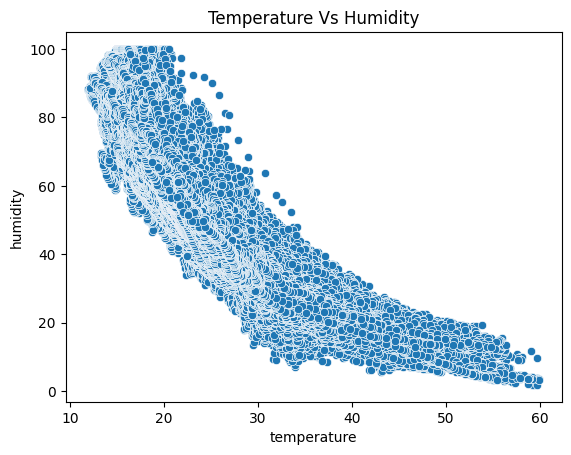

In [13]:
# plt.figure(figsize(10,12))
sns.scatterplot(data = df, x = "temperature",y = "humidity")
plt.title('Temperature Vs Humidity')
plt.show()

# Data Preprocessing

In [14]:
x = df.drop(columns = "temperature")
y = df['temperature']
print("x",x)
print("y",y)

x         sensor_id     lat     lon  pressure  humidity
0            2266  42.738  23.272  95270.27     62.48
1            2292  42.663  23.273  94355.83     59.46
2            3096  42.700  23.360  95155.81     44.38
3            3428  42.624  23.406  94679.57     38.28
4            3472  42.669  23.318  94327.88     46.37
...           ...     ...     ...       ...       ...
701543       3558  42.671  23.364  95562.08     52.28
701544       3836  42.702  23.371  96070.06     56.84
701545       3296  42.671  23.325  95230.42     51.72
701546       2234  42.685  23.356  95653.14     49.78
701547       2232  42.685  23.301  95418.48     51.44

[667783 rows x 5 columns]
y 0         23.46
1         23.06
2         26.53
3         28.34
4         26.31
          ...  
701543    21.99
701544    21.41
701545    22.53
701546    23.01
701547    22.57
Name: temperature, Length: 667783, dtype: float64


In [15]:
## Train-Test-Split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 2)

# Model Training

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluating Model Performance

In [17]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Means Squared Error:",mse)
print("R2 Score:",r2)


Means Squared Error: 7.423686890907163
R2 Score: 0.8226334995403447
